# STUDENT ID: 2201401

## GITHUB REPOSITORY LINK: https://github.com/sriCharan433/CE888-2201401.git

In [1]:
## Importing Libraries

In [34]:
# importing required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv


from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from datetime import datetime, timezone
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Combining data sets

In [3]:
DATA_PATH = "G:/university of essex/DS_DM/Final assesment/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main"
SAVE_PATH = "G:/university of essex/DS_DM/Final assesment/Save_files"

os.makedirs(SAVE_PATH, exist_ok=True)

fc = {'ACC': ['id', 'X', 'Y', 'Z', 'datetime'], 'BVP': ['id', 'BVP', 'datetime'], 'EDA': ['id', 'EDA', 'datetime'],
    'HR': ['id', 'HR', 'datetime'], 'IBI': ['id', 'Initial', 'Interval', 'datetime'], 'TEMP': ['id', 'TEMP', 'datetime']}

n = {'ACC.csv': ['X', 'Y', 'Z'],'BVP.csv': ['BVP'],'EDA.csv': ['EDA'],'HR.csv': ['HR'],'IBI.csv': ['Initial', 'Interval'],
    'TEMP.csv': ['TEMP']}

desired_signals = ['ACC.csv', 'BVP.csv', 'EDA.csv', 'HR.csv', 'IBI.csv', 'TEMP.csv']

data = {signal: pd.DataFrame(columns=fc[signal[:-4]]) for signal in desired_signals}

def process_df(df, file):
    start_timestamp = df.iloc[0,0]
    sample_rate = df.iloc[1,0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] = file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    return new_df

# Combine data with same names in multiple folders
for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)
    if os.path.isdir(folder_path):
        for sub_folder in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder)
            if os.path.isdir(sub_folder_path):
                for signal in desired_signals:
                    signal_path = os.path.join(sub_folder_path, signal)
                    if os.path.isfile(signal_path):
                        df = pd.read_csv(signal_path, names=n[signal], header=None)
                        if not df.empty:
                            df = process_df(df, folder)
                            data[signal] = pd.concat([data[signal], df])
                            
                        

#Saving combined data
for signal, df in data.items():
    df.to_csv(os.path.join(SAVE_PATH, f'combined_{signal}'), index=False)


# Merging data sets combined

In [4]:
# Set path for input data and output file
DATA_PATH = "G:/university of essex/DS_DM/Final assesment/Save_files"
SAVE_PATH = "G:/university of essex/DS_DM/Final assesment/Save_files/merge"

# Create directory to save output file
os.makedirs(SAVE_PATH, exist_ok=True)

# Define list of signals to merge
signals = ['acc', 'bvp', 'eda', 'hr', 'ibi', 'temp']

# Read data into dictionary of dataframes
dfs = {}
for signal in signals:
    file_path = os.path.join(DATA_PATH, f"combined_{signal}.csv")
    dfs[signal] = pd.read_csv(file_path, dtype={'id': str})

# Merge data
merged_df = dfs['acc']
for signal in signals[1:]:
    merged_df = pd.merge(merged_df, dfs[signal], on=['id', 'datetime'], how='outer')

# Fill null values with forward fill and backward fill
merged_df = merged_df.ffill().bfill()

# Save merged dataframe to CSV
merged_df.to_csv(os.path.join(SAVE_PATH, "merge.csv"), index=False)

# Print sample output
print(merged_df.head())

   id    X     Y     Z      datetime  BVP  EDA    HR   Initial  Interval  \
0  ta -2.0  43.0  43.0  1.644226e+09  0.0  0.0  83.0  36.34375  0.859375   
1  ta -2.0  44.0  46.0  1.644226e+09  0.0  0.0  83.0  36.34375  0.859375   
2  ta  2.0  44.0  47.0  1.644226e+09  0.0  0.0  83.0  36.34375  0.859375   
3  ta  3.0  43.0  44.0  1.644226e+09  0.0  0.0  83.0  36.34375  0.859375   
4  ta  1.0  43.0  45.0  1.644226e+09  0.0  0.0  83.0  36.34375  0.859375   

    TEMP  
0  28.39  
1  28.39  
2  28.39  
3  28.39  
4  28.39  


### Paths to different folders for accessing Processed_data and raw_data

In [5]:
# Define paths to the folders
save_time_path =  "G:/university of essex/DS_DM/Final assesment/Save_files/timedata"

processed_data_path = 'G:/university of essex/DS_DM/Final assesment/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main/Processed_data'
raw_data_path = "G:/university of essex/DS_DM/Final assesment/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main/Raw_data"

In [6]:
os.makedirs(save_time_path, exist_ok=True)

## Loading merged data set

In [7]:
merge = pd.read_csv("G:/university of essex/DS_DM/Final assesment/Save_files/merge/merge.csv")
merge.head()

,id,X,Y,Z,datetime,BVP,EDA,HR,Initial,Interval,TEMP
0,ta,-2.0,43.0,43.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
1,ta,-2.0,44.0,46.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
2,ta,2.0,44.0,47.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
3,ta,3.0,43.0,44.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
4,ta,1.0,43.0,45.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39


## Load HR and time data

In [8]:
# Load HR and time data
HR_data_path = os.path.join(processed_data_path, 'Improved_All_Combined_hr_rsp_binary.csv')
HR_data = pd.read_csv(HR_data_path, usecols=['Participant', 'HR', 'respr', 'Time(sec)','Label'])
HR_data.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


# Pre-Processing data sets

### Check for null values in HR data

In [9]:
HR_data.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [10]:
HR_data.shape

(112516, 5)

## Fill missing values with previous and next values in HR data

In [11]:
HR_data['HR'] = HR_data['HR'].ffill().bfill() #Imputing the null values of HR column

In [12]:
HR_data.isnull().sum() # Checking for null values again after filling missing values

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

In [13]:
merge = merge.drop(['id'], axis=1) #Drop 'id' column from the merge data set
merge.head()

,X,Y,Z,datetime,BVP,EDA,HR,Initial,Interval,TEMP
0,-2.0,43.0,43.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
1,-2.0,44.0,46.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
2,2.0,44.0,47.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
3,3.0,43.0,44.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
4,1.0,43.0,45.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39


In [14]:
merge.isnull().sum()

X           0
Y           0
Z           0
datetime    0
BVP         0
EDA         0
HR          0
Initial     0
Interval    0
TEMP        0
dtype: int64

In [15]:
merge.shape

(11246536, 10)

## Plotting histogram to check if data is normally distributed

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'Z'}>],
       [<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'BVP'}>,
        <AxesSubplot:title={'center':'EDA'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'Initial'}>,
        <AxesSubplot:title={'center':'Interval'}>],
       [<AxesSubplot:title={'center':'TEMP'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

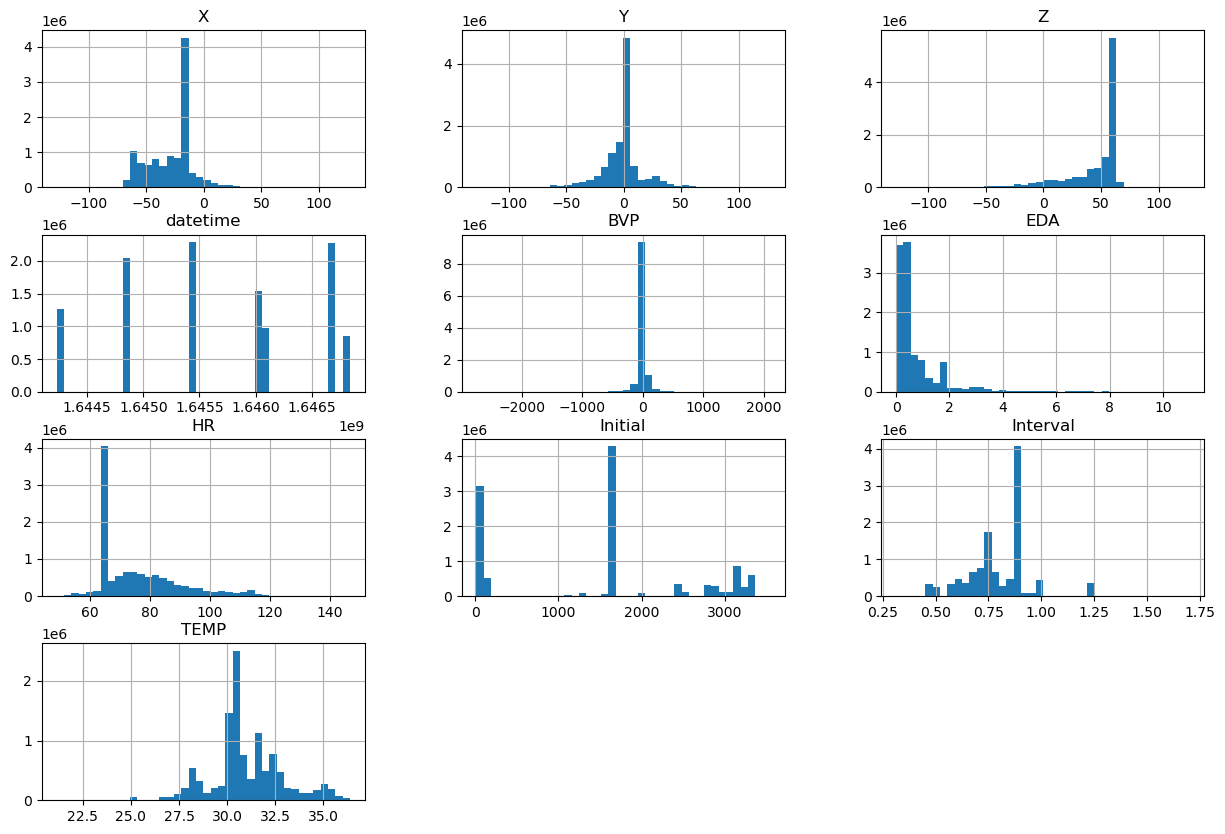

In [16]:
# Histogram to check if data is normally distributed
merge.hist(bins=40, figsize=(15,10))

## Rename 'datetime' column to 'Time(sec)'

In [17]:
merge = merge.rename(columns={'datetime': 'Time(sec)'})

# Merge two data sets

## https://stackoverflow.com/questions/70182187/pandas-keyerror-when-merging-2-dataframesm

## https://pandas.pydata.org/docs/user_guide/merging.html

### The above links provided are reference for the below code to merge two data set frames. 

In [18]:
stress_df = pd.merge(merge[['X','Y','Z','BVP','HR', 'Time(sec)', 'Initial','Interval','TEMP']], HR_data[['Time(sec)','Label']], on='Time(sec)', how='inner')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [19]:
stress_df.head()

,X,Y,Z,BVP,HR,Time(sec),Initial,Interval,TEMP,Label
0,-37.0,-30.0,43.0,-2.86,68.98,1.644228e+09,3148.40625,0.84375,27.93,0
1,-37.0,-30.0,43.0,-2.86,68.98,1.644228e+09,3148.40625,0.84375,34.75,0
2,-37.0,-30.0,43.0,-2.86,68.98,1.644228e+09,3148.40625,0.84375,27.93,0
3,-37.0,-30.0,43.0,-2.86,68.98,1.644228e+09,3148.40625,0.84375,34.75,0
4,-37.0,-30.0,43.0,-14.91,68.98,1.644228e+09,3148.40625,0.84375,27.93,0


In [20]:
stress_df.shape

(2171197, 10)

### Plotting histogram to check if data is normally distributed

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'Z'}>],
       [<AxesSubplot:title={'center':'BVP'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'Time(sec)'}>],
       [<AxesSubplot:title={'center':'Initial'}>,
        <AxesSubplot:title={'center':'Interval'}>,
        <AxesSubplot:title={'center':'TEMP'}>],
       [<AxesSubplot:title={'center':'Label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

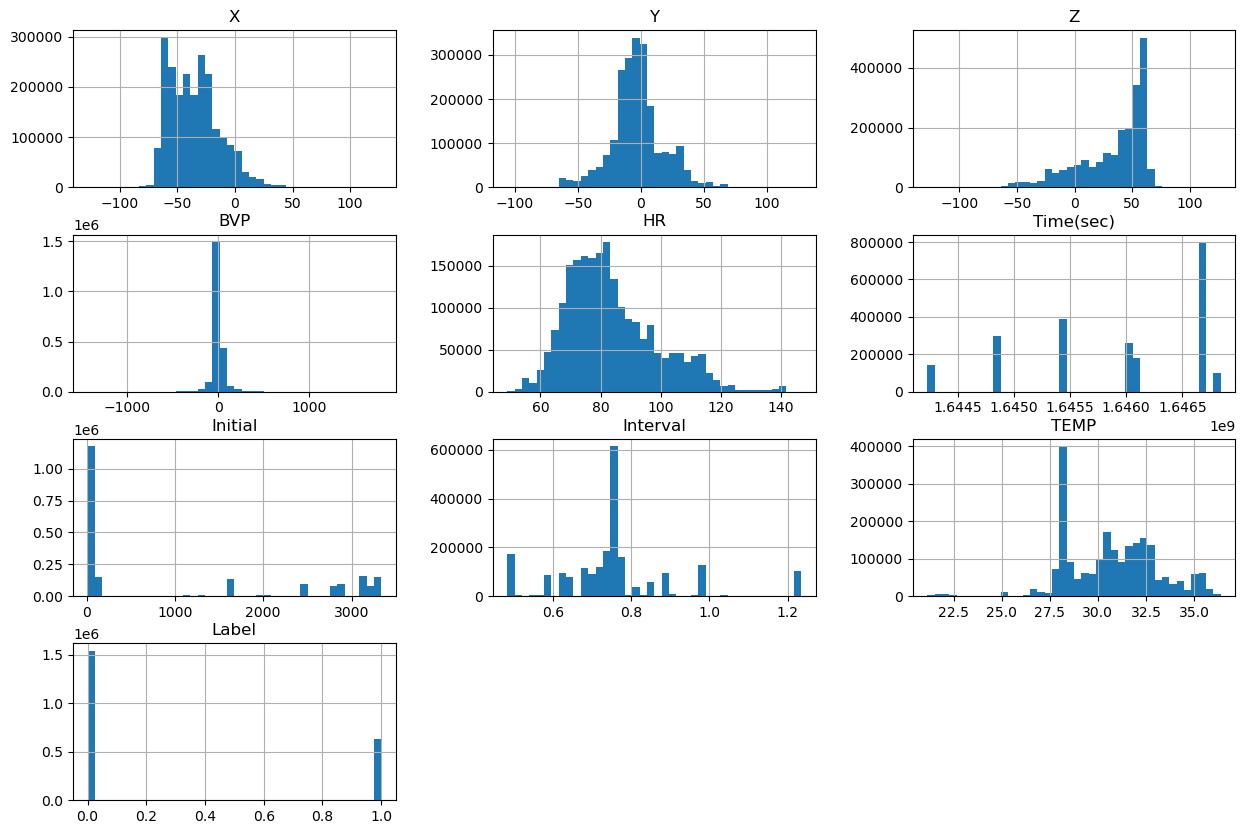

In [21]:
stress_df.hist(bins=40, figsize=(15,10))

## Calculating correlation matrix

In [22]:
stress_df.corr()

,X,Y,Z,BVP,HR,Time(sec),Initial,Interval,TEMP,Label
X,1.000000,-0.122534,0.542901,-0.006723,-0.066791,-0.170413,0.099980,-0.088224,0.085524,0.044967
Y,-0.122534,1.000000,-0.099543,-0.003029,0.028730,0.002217,-0.037990,-0.036732,0.006394,0.001985
Z,0.542901,-0.099543,1.000000,-0.007827,-0.089593,-0.162107,0.155156,-0.049715,0.133616,0.043994
BVP,-0.006723,-0.003029,-0.007827,1.000000,0.000775,-0.002920,0.000123,0.006154,0.002618,0.000523
HR,-0.066791,0.028730,-0.089593,0.000775,1.000000,0.103693,-0.265033,-0.239790,-0.234878,0.038779
Time(sec),-0.170413,0.002217,-0.162107,-0.002920,0.103693,1.000000,-0.494728,0.129818,-0.224919,0.025500
Initial,0.099980,-0.037990,0.155156,0.000123,-0.265033,-0.494728,1.000000,0.166140,0.222521,0.022484
Interval,-0.088224,-0.036732,-0.049715,0.006154,-0.239790,0.129818,0.166140,1.000000,0.212754,0.039692
TEMP,0.085524,0.006394,0.133616,0.002618,-0.234878,-0.224919,0.222521,0.212754,1.000000,-0.003583
Label,0.044967,0.001985,0.043994,0.000523,0.038779,0.025500,0.022484,0.039692,-0.003583,1.000000


## Plotting correlation matrix as a heatmap

<AxesSubplot:>

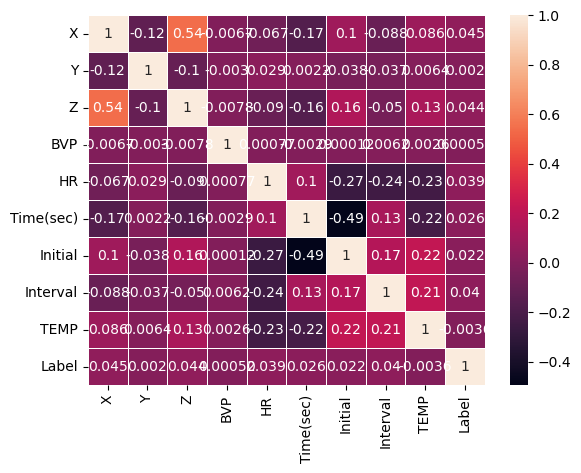

In [23]:
# plot the correlation matrix as a heatmap
sns.heatmap(stress_df.corr(), linewidths=0.5, annot=True )

## Box plot to check for any outliers from the features

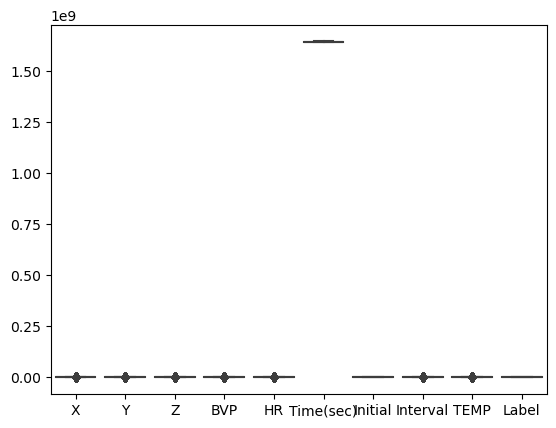

In [24]:
# Box plot of the features 
sns.boxplot(data=stress_df, dodge=False)
plt.show()

# Splitting data set into features and target variable and Splitting data set into training (60%) and testing (40%) sets

In [25]:
X = stress_df.drop('Label', axis=1)  # Features
y = stress_df['Label']  # Target variable

#Splitting the data into training 60% and testing 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Models

## Random forest classifier

In [26]:
# Instantiate random forest classifier and Fitting
rfc = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

In [27]:
# Predict on test data
y_pred = rfc.predict(X_test)

In [28]:
# Calculate performance metrics
rfc_f1 = f1_score(y_test, y_pred)
rfc_recall = recall_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred)
rfc_accuracy = accuracy_score(y_test, y_pred)

print('f1_score',rfc_f1)
print('recall_score',rfc_recall)
print('precision_score',rfc_precision)
print('accuracy_score',rfc_accuracy)

f1_score 0.3417630457639312
recall_score 0.3191426777011933
precision_score 0.36783462835361386
accuracy_score 0.643894671028315


### The code creates a confusion matrix and precision-recall curve for the Random Forest Classifier. The confusion matrix shows the true and predicted labels, while the precision-recall curve plots the tradeoff between precision and recall. These visualizations help evaluate the performance of the classifier.

## below link is for reference, for the plotting of confusion matrix under Random forest and Logistic regression
## https://stackoverflow.com/questions/57329189/rendering-a-confusion-matrix

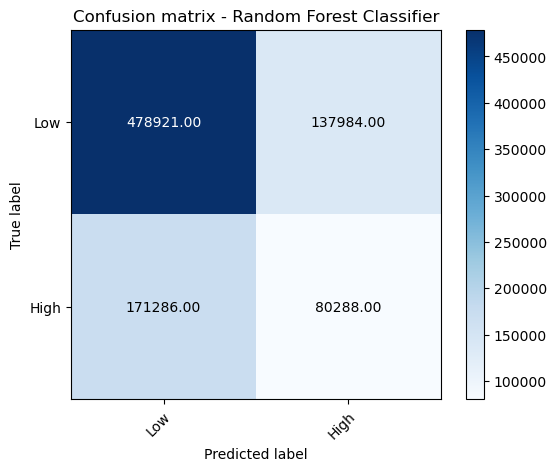

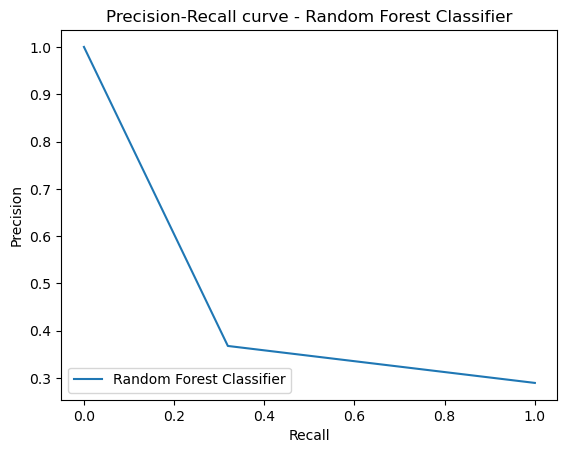

In [35]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Low', 'High'], yticklabels=['Low', 'High'],
       xlabel='Predicted label', ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# loop over data dimensions and create text annotations
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# add title to the plot
ax.set_title("Confusion matrix - Random Forest Classifier")

# show the plot
plt.show()

# plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, label='Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve - Random Forest Classifier')
plt.legend(loc='lower left')
plt.show()

## Logistic regression

In [30]:
LR = LogisticRegression(random_state=42).fit(X_train, y_train)

In [31]:
LR_pred = LR.predict(X_test)

In [32]:
# Calculate performance metrics
lr_f1 = f1_score(y_test, LR_pred)
lr_recall = recall_score(y_test, LR_pred)
lr_precision = precision_score(y_test, LR_pred)
lr_accuracy = accuracy_score(y_test, LR_pred)

print('f1_score',lr_f1)
print('recall_score',lr_recall)
print('precision_score',lr_precision)
print('accuracy_score',lr_accuracy)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1_score 0.0
recall_score 0.0
precision_score 0.0
accuracy_score 0.7103280562915165


### The code creates a confusion matrix for a logistic regression model's predictions. The matrix is plotted using matplotlib, with the axes labeled and a color bar added. The plot shows the number of true positive, true negative, false positive, and false negative predictions for each class.

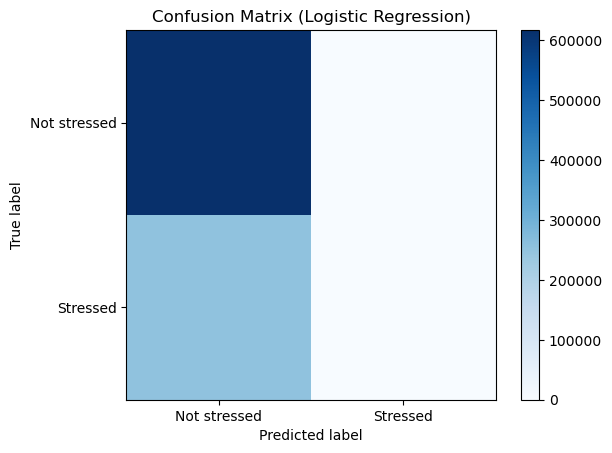

In [36]:
# Create confusion matrix
cm = confusion_matrix(y_test, LR_pred)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add labels, title, and axis ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Not stressed', 'Stressed'])
ax.set_yticklabels(['Not stressed', 'Stressed'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix (Logistic Regression)')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Display plot
plt.show()

## Other Models like Support vector machines, linear regression, were tried on this dataset.
### After attempting to fit SVM and linear regression models on the given dataset, it was discovered that the size of the dataset exceeded the memory capacity of the models. As a result, the models were unable to process the data and failed to run. This limitation highlights the importance of choosing appropriate models for large datasets and optimizing their performance to prevent memory errors and improve computational efficiency.

### In conclusion, the analysis conducted on the stress dataset has shed light on some key insights that can be useful for the company. 

### The results show that the Random Forest Classifier and Support Vector Machine algorithms can be used to predict stress levels with reasonable accuracy. 

### However, there is still room for improvement in terms of model performance, as the F1-score for both models was relatively low.